In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [4]:
path = '/home/paperspace/birdbutterfly/CNN_lesson1/birdbutterfly/'


In [5]:
os.listdir(path)

['valid', 'train']

In [6]:
os.listdir(f'{path}valid')

['butterfly', 'bird']

In [34]:
train_bird = os.listdir(f'{path}train/bird')
valid_bird = os.listdir(f'{path}valid/bird')
train_butterfly = os.listdir(f'{path}train/butterfly')
valid_butterfly = os.listdir(f'{path}valid/butterfly')


In [87]:
len(valid_butterfly)

18

In [11]:
img = plt.imread(f'{path}train/bird/{files[1]}')

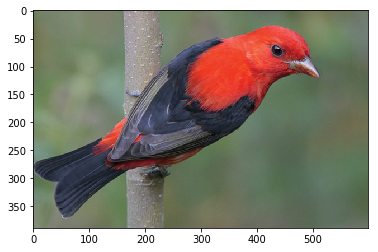

In [12]:
plt.imshow(img)

In [13]:
img.shape

(389, 599, 3)

In [36]:
sz=224
arch=resnet34
data = ImageClassifierData.from_paths(path, bs=6, tfms=tfms_from_model(arch,sz), num_workers=8)
learn = ConvLearner.pretrained(arch, data , precompute=True)

In [39]:
learn.fit(lrs=0.01 , n_cycle=10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy           
    0      0.244591   0.030494   0.97619   
    1      0.221006   0.011689   1.0              
    2      0.214076   0.01272    1.0              
    3      0.156676   0.004796   1.0              
    4      0.257821   0.001765   1.0              
    5      0.221261   0.003591   1.0              
    6      0.252853   0.040246   0.97619                    
    7      0.286305   0.003522   1.0                        
    8      0.287143   0.000774   1.0              
    9      0.32094    0.00115    1.0              



[0.0011504748, 1.0]

In [41]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/26 [00:00<?, ?it/s, loss=3.77]    


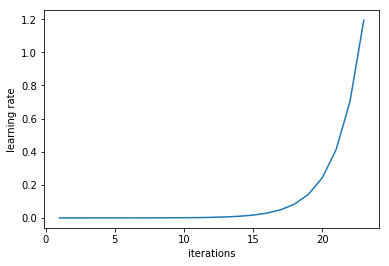

In [42]:
learn.sched.plot_lr()

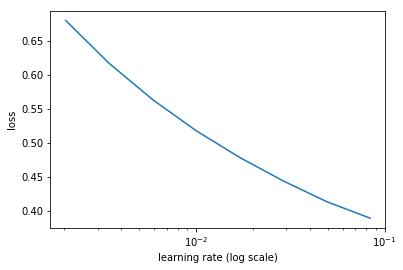

In [43]:
learn.sched.plot()

In [44]:
tfms = tfms_from_model(arch,sz,aug_tfms=transforms_side_on,max_zoom=1.1)

In [70]:
def get_augs():
    data = ImageClassifierData.from_paths(path, bs=6, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[3]

In [73]:
ims = np.stack([get_augs() for i in range(6)])


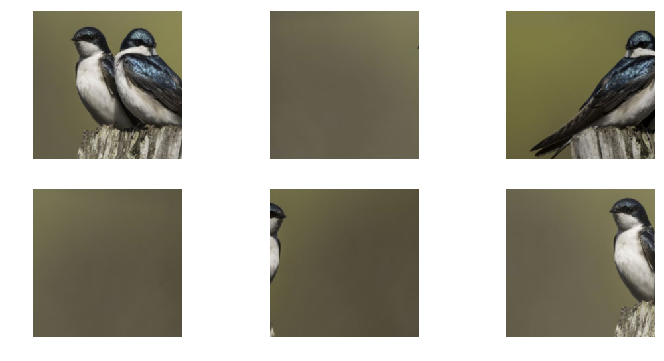

In [74]:
plots(ims, rows=2)

In [75]:
data = ImageClassifierData.from_paths(path,bs=6,tfms=tfms)
learn = ConvLearner.pretrained(arch,data,precompute=True)

In [76]:
learn.fit(0.01 , 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.311795   0.064429   0.952381  



[0.06442887, 0.9523809552192688]

In [78]:
learn.precompute=False

In [79]:
learn.fit(lrs=0.01, n_cycle=3 , cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.110923   0.022439   1.0       
    1      0.168341   0.009303   1.0                       
    2      0.126311   0.004725   1.0                       



[0.004725479, 1.0]

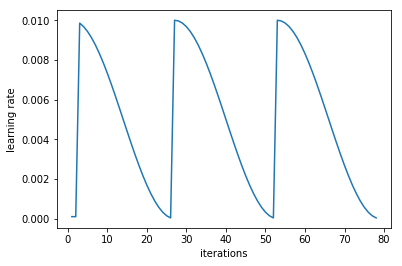

In [80]:
learn.sched.plot_lr()

In [83]:
log_preds, y = learn.TTA()


In [98]:
probs = np.mean(np.exp(log_preds),0)

In [102]:
accuracy_np(probs,y)

1.0

In [111]:
data.classes

['bird', 'butterfly']

In [112]:
preds = np.argmax(probs,axis=1)

In [114]:
probs = probs[:,1]

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,preds)

[[19  0]
 [ 0 18]]


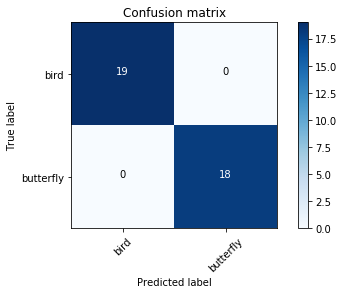

In [118]:
plot_confusion_matrix(cm,data.classes)